In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import env

In [2]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = '''
SELECT id, name, start_date, end_date, program_id, date, time, path, user_id, cohort_id, ip, created_at, updated_at
From cohorts as c 
join logs as l on c.id = l.cohort_id;
'''
df = pd.read_sql(query, url)
df.head()

,id,name,start_date,end_date,program_id,date,time,path,user_id,cohort_id,ip,created_at,updated_at
0,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26
1,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26
2,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26
3,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26
4,22,Teddy,2018-01-08,2018-05-17,2,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-08 13:59:10,2018-01-08 13:59:10


### Label students by the program they are in.

In [7]:
df.path.value_counts()

/                                                               45854
javascript-i                                                    18203
toc                                                             17591
search/search_index.json                                        17534
java-iii                                                        13166
                                                                ...  
content/examples/javascript/primitive-types.html                    1
content/examples/javascript/conditionals.html                       1
2-storytelling/1-overview/www.qlik.com                              1
syntax-types-and-variables                                          1
appendix/professional-development/post-interview-review-form        1
Name: path, Length: 2224, dtype: int64

In [4]:
df.name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Darden        32015
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Bayes         26538
Wrangell      25586
Andromeda     25359
Kalypso       23691
Curie         21582
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Easley        14715
Lassen         9587
Arches         8890
Florence       8562
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: name, dtype: int64

<AxesSubplot:xlabel='date'>

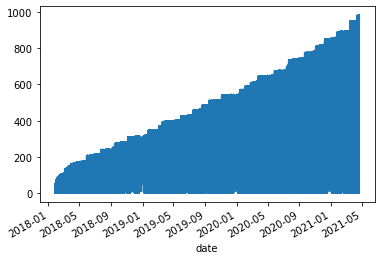

### Is it possible to identify the user_id of a staff member?

In [8]:
# Ste date column as datetime dtype and then sset as index 
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 to 2021-04-21
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          847330 non-null  int64         
 1   name        847330 non-null  object        
 2   start_date  847330 non-null  object        
 3   end_date    847330 non-null  object        
 4   program_id  847330 non-null  int64         
 5   date        847330 non-null  datetime64[ns]
 6   time        847330 non-null  object        
 7   path        847329 non-null  object        
 8   user_id     847330 non-null  int64         
 9   cohort_id   847330 non-null  float64       
 10  ip          847330 non-null  object        
 11  created_at  847330 non-null  object        
 12  updated_at  847330 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 90.5+ MB


In [11]:
pages = df['path'].resample('d').count()
pages.head()

date
2018-01-26    533
2018-01-27    230
2018-01-28    168
2018-01-29    783
2018-01-30    614
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='date'>

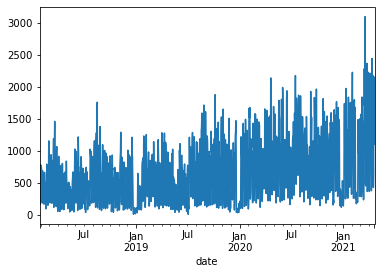

In [12]:
pages.plot()

### Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [31]:
df["month"] = df.index.month_name()

In [32]:
df.head()

,id,name,start_date,end_date,program_id,date,time,path,user_id,cohort_id,ip,created_at,updated_at,month
date,,,,,,,,,,,,,,
2018-01-26,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,January
2018-01-26,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,January
2018-01-26,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,January
2018-01-26,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,January
2018-01-26,22,Teddy,2018-01-08,2018-05-17,2,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-08 13:59:10,2018-01-08 13:59:10,January


In [33]:
df.start_date = pd.to_datetime(df.start_date)

In [34]:
df.head()

,id,name,start_date,end_date,program_id,date,time,path,user_id,cohort_id,ip,created_at,updated_at,month
date,,,,,,,,,,,,,,
2018-01-26,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,January
2018-01-26,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,January
2018-01-26,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,January
2018-01-26,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,January
2018-01-26,22,Teddy,2018-01-08,2018-05-17,2,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-08 13:59:10,2018-01-08 13:59:10,January


In [35]:
df.end_date = pd.to_datetime(df.end_date)

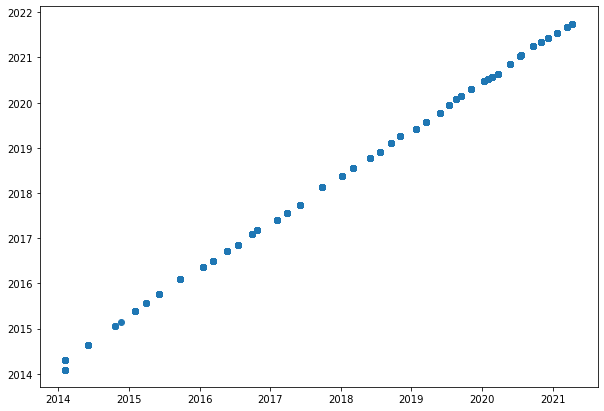

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(df.start_date, df.end_date)

In [44]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_user = df['path'].resample('d').count()
    return pages_one_user

In [45]:
def compute_pct_b(pages_one_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [46]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [47]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

### Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [48]:
user = 1
span = 30
weight = 6
user_df = find_anomalies(df, user, span, weight)

anomalies = pd.DataFrame()
user_df = find_anomalies(df, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)

In [49]:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [50]:
anomalies

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2018-10-15,9,0.581421,8.457414,-7.294571,1.034446,3
2019-01-09,4,0.262470,3.802115,-3.277175,1.027953,3
2019-04-06,2,0.129825,1.889712,-1.630061,1.031334,3
...,...,...,...,...,...,...
2021-01-24,7,0.574393,6.857226,-5.708440,1.011362,817
2021-03-25,59,6.824556,58.415342,-44.766230,1.005666,843
2021-02-23,67,8.229409,66.322904,-49.864086,1.005828,851


In [51]:
anomalies.sort_values(by='pages_one_user', ascending=False)

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521
...,...,...,...,...,...,...
2019-03-11,1,0.064517,0.939111,-0.810077,1.034810,124
2019-03-20,1,0.064516,0.939061,-0.810029,1.034841,126
2020-11-21,1,0.065202,0.959398,-0.828994,1.022703,410


In [52]:
df_341 = one_user_df_prep(df, 341)

<AxesSubplot:xlabel='date'>

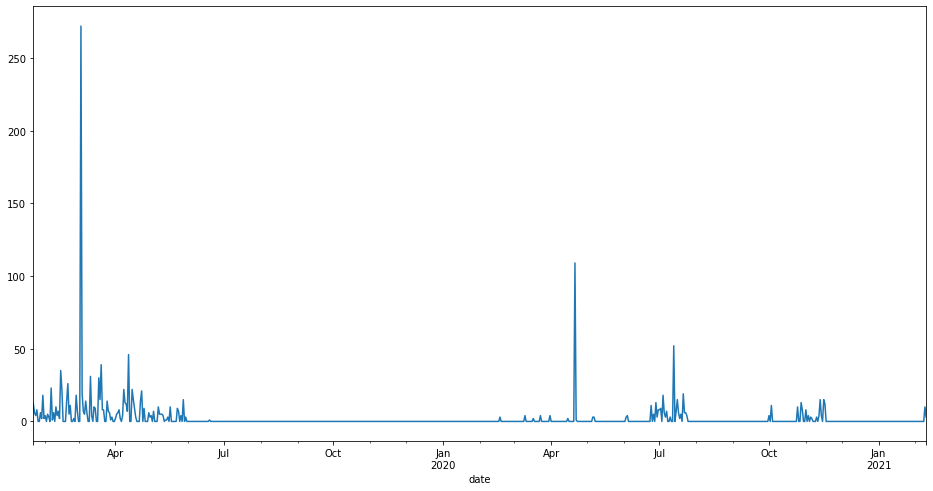

In [53]:
df_341.plot(figsize=(16,8))

In [54]:
df_146 = one_user_df_prep(df, 146)

<AxesSubplot:xlabel='date'>

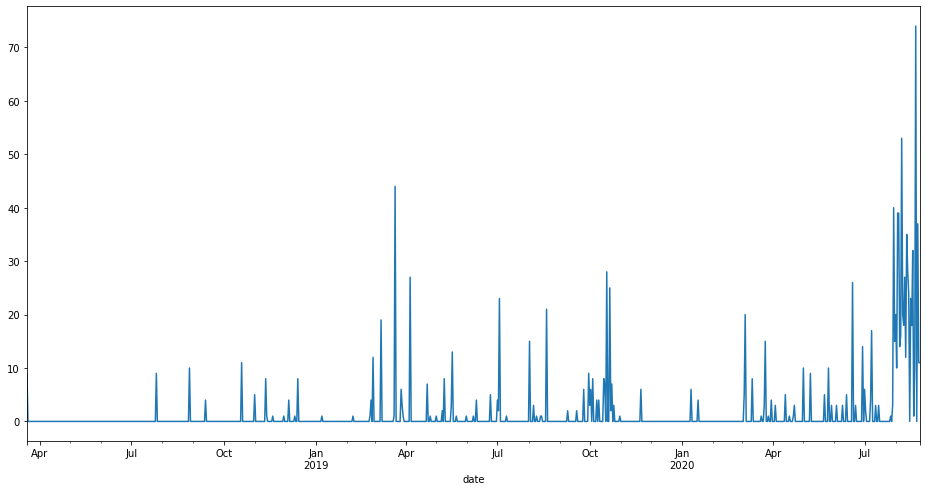

In [55]:
df_146.plot(figsize=(16,8))

In [56]:
anomalies.user_id.value_counts()

146    11
80     11
18     10
291     9
88      8
       ..
526     1
527     1
528     1
533     1
859     1
Name: user_id, Length: 380, dtype: int64

In [62]:
df.iloc[146]

id                                           22
name                                      Teddy
start_date                  2018-01-08 00:00:00
end_date                    2018-05-17 00:00:00
program_id                                    2
date                        2018-01-26 00:00:00
time                                   11:47:38
path          javascript-i/javascript-with-html
user_id                                       5
cohort_id                                  22.0
ip                                 97.105.19.61
created_at                  2018-01-08 13:59:10
updated_at                  2018-01-08 13:59:10
month                                   January
Name: 2018-01-26 00:00:00, dtype: object

In [57]:
df_80 = one_user_df_prep(df, 80)

#I think this one looks weird 

<AxesSubplot:xlabel='date'>

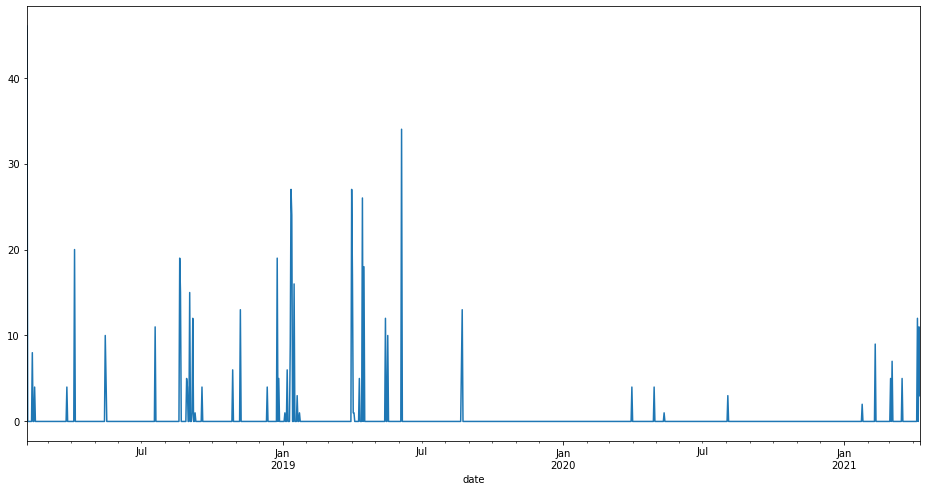

In [58]:
df_80.plot(figsize=(16,8))

In [61]:
df.iloc[80]

id                                    21
name                             Sequoia
start_date           2017-09-27 00:00:00
end_date             2018-02-15 00:00:00
program_id                             2
date                 2018-01-26 00:00:00
time                            11:12:04
path          appendix/capstone-workbook
user_id                               10
cohort_id                           21.0
ip                          97.105.19.61
created_at           2017-09-27 20:22:41
updated_at           2017-09-27 20:22:41
month                            January
Name: 2018-01-26 00:00:00, dtype: object

<AxesSubplot:xlabel='date'>

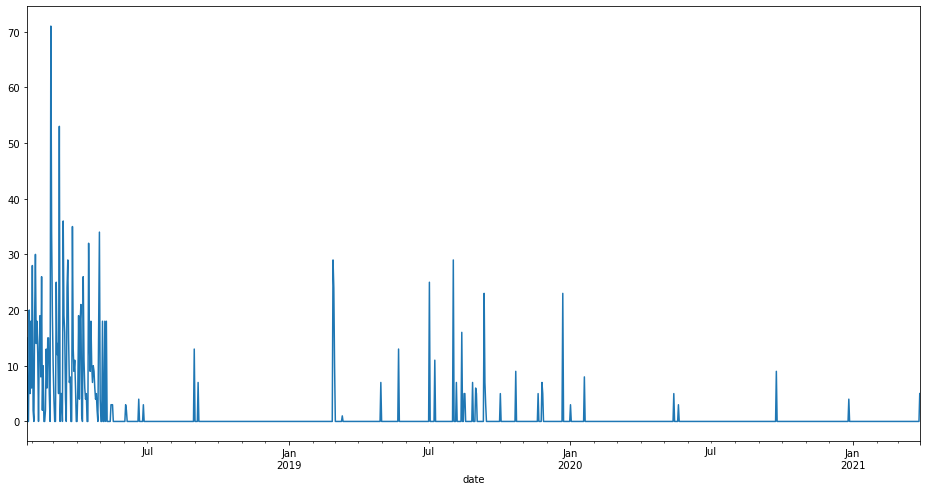

In [59]:
df_18 = one_user_df_prep(df, 18)
df_18.plot(figsize=(16,8))

#this kinda looks normal??

In [60]:
df.iloc[18]

id                                22
name                           Teddy
start_date       2018-01-08 00:00:00
end_date         2018-05-17 00:00:00
program_id                         2
date             2018-01-26 00:00:00
time                        10:02:02
path          javascript-i/functions
user_id                            7
cohort_id                       22.0
ip                      97.105.19.61
created_at       2018-01-08 13:59:10
updated_at       2018-01-08 13:59:10
month                        January
Name: 2018-01-26 00:00:00, dtype: object

### Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2.

### Plot the access activity of these students.